In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plotLearningCurve(model, X, y):
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    trainError, valError = [],[]
    
    for m in range(1, len(X_train)):
        
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val[:m])
        
        trainError.append(mean_squared_error(y_train_pred, y_train[:m]))
        valError.append(mean_squared_error(y_val_pred, y_val[:m]))
        
    plt.plot(np.sqrt(trainError), 'r-+', linewidth=2, label="Train Error")
    plt.plot(np.sqrt(valError), 'b-', linewidth=2, label="Validation Error")
    plt.show()


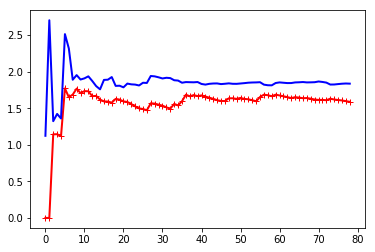

In [3]:
from sklearn.linear_model import LinearRegression

m=100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+2+np.random.randn(m,1)

linearModel = LinearRegression()
plotLearningCurve(linearModel, X, y)

# Regularized Regression

### Ridge regression

In [6]:
from sklearn.linear_model import Ridge, SGDRegressor

ridgeRegression = Ridge(alpha=1, solver='cholesky')
sgd = SGDRegressor(penalty='l2')

ridgeRegression.fit(X, y)
print("Ridge: ", ridgeRegression.predict([[1.55]]))

sgd.fit(X, y.ravel())
print("SGD: ", sgd.predict([[1.55]]))

('Ridge: ', array([[ 5.20391493]]))
('SGD: ', array([ 4.36879268]))


### Lasso regression

In [8]:
from sklearn.linear_model import Lasso

lassoRegression = Lasso(alpha=0.1)
lassoRegression.fit(X, y)

print("Lasso: ", lassoRegression.predict([[1.55]]))

('Lasso: ', array([ 5.16696486]))


### Elastic Net

In [9]:
from sklearn.linear_model import ElasticNet

elasticNetRegression = ElasticNet(alpha=0.1, l1_ratio=0.4)
elasticNetRegression.fit(X, y)
print("Elastic Net: ", elasticNetRegression.predict([[1.55]]))

('Elastic Net: ', array([ 5.16765529]))
